Análisis de datos en salud
============================

Unidad 7
-----------------------------------------------------
May 11th

El grafo de las familias florentinas es una red social histórica que representa las relaciones entre algunas de las principales familias de Florencia durante el Renacimiento.

El grafo modela las alianzas matrimoniales y económicas entre las familias influyentes de Florencia en el siglo XV. Cada nodo representa una familia noble, y cada arista indica una relación de matrimonio o alianza política entre dos familias.

Este grafo se basa en los estudios de John Padgett y Christopher Ansell (1993) sobre redes sociales y dinámicas políticas en el Renacimiento. Algunas de las familias más conocidas son:
- Medici: La familia más poderosa, con múltiples conexiones.
- Strozzi: Rivales de los Medici.
- Albizzi: Otra familia influyente, también enemiga de los Medici.
- Pazzi: Conocidos por la conspiración contra los Medici.

### Ejercicio 1
**(3.5 puntos)**

Primero de todo vamos a explorar un poco el grafo y su estructua.

a) Carga el grafo de las familias Florentinas de NetworkX (florentine_families_graph) y visualizalo con Matplotlib. **(0.5 puntos)**





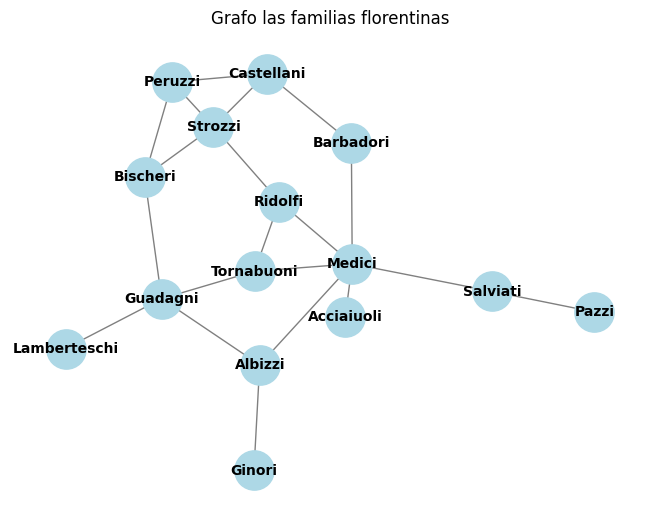

In [ ]:
# Cargamos las librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt

# NetworkX Florentine Families
G = nx.florentine_families_graph()

# VISUALIZE
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Grafo las familias florentinas")
plt.show()

b) Calcula y muestra el número de nodos y aristas del grafo. **(0.5 puntos)**



In [ ]:
# Guardamos el número de nodos y aristas
num_nodos = G.number_of_nodes()
num_aristas = G.number_of_edges()

# Mostramos el resultado por pantalla
print(f'Nodos (Nodes): \x1b[38;5;141m {num_nodos} \033[0m & Aristas (Edges): \033[34m {num_aristas}')

Nodos (Nodes):  15  & Aristas (Edges):  20


EDGES:

E1 (Acciaiuoli - Medici)

E2 (Salviati - Medici)

E3 Salviati - Pazzi

E4 (Ginori - Albizzi)

E5 (Albizzi - Medici)

E6 (Albizzi - Guadagni)

E7 (Lamberteschi - Guadagni)

E8 (Guadagni - Tornabuoni)

E9 (Guadagni - Bischeri)

E10 (Tornabuoni - Medici)

E11 (Tornabuoni - Ridolfi)

E12 (Ridolfi - Medici)

E13 (Barbadori - Medici)

E14 (Barbadori - Castellani)

E15 (Strozzi - Castellani)

E16 (Peruzzi - Castellani)

E17 (Strozzi - Peruzzi)

E18 (Peruzzi - Bischeri)

E19 (Strozzi - Bischeri)

E20 (Ridolfi - Strozzi)

c) ¿Cuál es el grado (*degree*) medio de los nodos? ¿Qué familia es más conectada? **(0.5 puntos)**



In [ ]:
# Calculamos el grado medio y el máximo
grado_medio = sum(dict(G.degree()).values()) / G.number_of_nodes()
nodo_max_grado = max(G.degree, key=lambda x: x[1])

# Mostramos el resultado por pantalla
print(f'Grado medio: \x1b[38;5;153m{grado_medio} \033[0m, Nodo con mayor grado: \x1b[38;5;117m {nodo_max_grado}')

Grado medio: 2.6666666666666665 , Nodo con mayor grado:  ('Medici', 6)


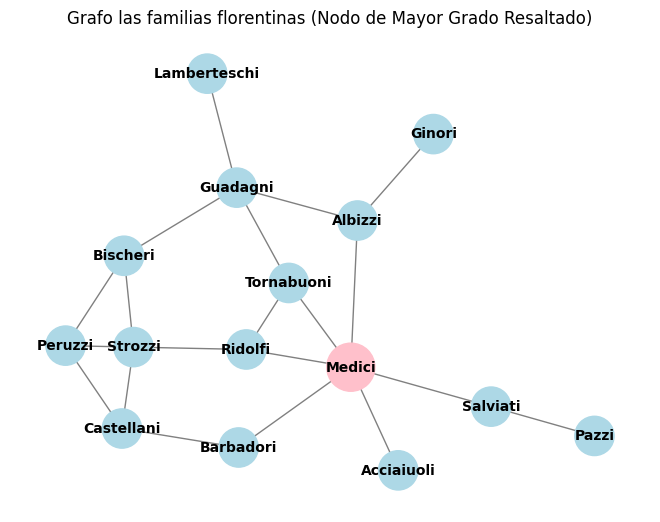

In [ ]:
# Visualizar el grafo con el nodo de mayor grado resaltado
pos = nx.spring_layout(G)
node_colors = ['lightblue'] * G.number_of_nodes()
node_sizes = [800] * G.number_of_nodes()

# INDEX OF NODE WITH MAX DEGREE
index_nodo_max_grado = list(G.nodes()).index(nodo_max_grado[0])

# INDEX: CHANGE COLOR & SIZE
node_colors[index_nodo_max_grado] = 'pink'
node_sizes[index_nodo_max_grado] = 1200

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Grafo las familias florentinas (Nodo de Mayor Grado Resaltado)")
plt.show()

Los Medici 👪 son las familia más conectada

d) Calcula la centralidad de intermediación para identificar la familia que actua como puente. **(0.5 puntos)**



In [ ]:
# Calculamos las medidas de centralidad y mostramos el valor
centralidad_grado = nx.degree_centrality(G)
nodo_max_centrality1 = max(centralidad_grado.items(), key=lambda x: x[1])
print(f'Centralidad de grado: \033[38;5;177m {nodo_max_centrality1} \033[0m')


centralidad_cercania = nx.closeness_centrality(G)
nodo_max_centrality2 = max(centralidad_cercania.items(), key=lambda x: x[1])
print(f'Centralidad de cercania: \033[38;5;147m {nodo_max_centrality2} \033[0m')

centralidad_intermediacion = nx.betweenness_centrality(G)
nodo_max_centrality3 = max(centralidad_intermediacion.items(), key=lambda x: x[1])
print(f'Centralidad de intermediacion: \x1b[38;5;183m {nodo_max_centrality3}')

Centralidad de grado:  ('Medici', 0.42857142857142855) 
Centralidad de cercania:  ('Medici', 0.56) 
Centralidad de intermediacion:  ('Medici', 0.521978021978022)


e) ¿Existen grupos separados o está todo conectado? **(0.5 puntos)**

**Nota**: Puedes usar la función number_connected_components para responder a la pregunta.



In [ ]:
# FUNCTION TO ANSWER THIS ¿Existen grupos separados o está todo conectado?
def number_connected_components(G):
  return nx.number_connected_components(G)

# GRAPH FUNCTION FOR FLORENTINE FAMILIES
num_componentes = number_connected_components(G) # CALL IT & STORE IT IN THE VARIABLE num_componentes

print(f"Número de componentes conectados: \x1b[38;5;153m {num_componentes}")

Número de componentes conectados:  1


All of them are conected between them directly and indirectly.

f) ¿Se pueden agrupar familias en facciones? Usa la función `greedy_modularity_communities` para detectar comunidades. Visualiza el grafo con las comunidades con distinto color. **(1 punto)**

In [ ]:
# FUNCTION
def greedy_modularity_communities(G):
  return list(nx.community.greedy_modularity_communities(G))

# FIND THE COMMUNITIES
community = greedy_modularity_communities(G)

if len(community) > 1:
    print("Families can be grouped into factions.")
else:
    print("All families belong to the same faction.")

# Mostramos las comunidades: Frozenset-> Immutable & Hashable
print(community)

Families can be grouped into factions.
[frozenset({'Tornabuoni', 'Medici', 'Ridolfi', 'Pazzi', 'Acciaiuoli', 'Salviati'}), frozenset({'Peruzzi', 'Bischeri', 'Barbadori', 'Strozzi', 'Castellani'}), frozenset({'Albizzi', 'Lamberteschi', 'Ginori', 'Guadagni'})]


 Si pueden agrupar familias en facciones:

- Tornabuoni', 'Medici', 'Ridolfi', 'Pazzi', 'Acciaiuoli', & 'Salviati'

- Peruzzi', 'Bischeri', 'Barbadori', 'Strozzi', & 'Castellani'

-  Albizzi', 'Lamberteschi', 'Ginori', & 'Guadagni'


<ipython-input-24-729fbb32ca66>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Pastel1', num_communities)


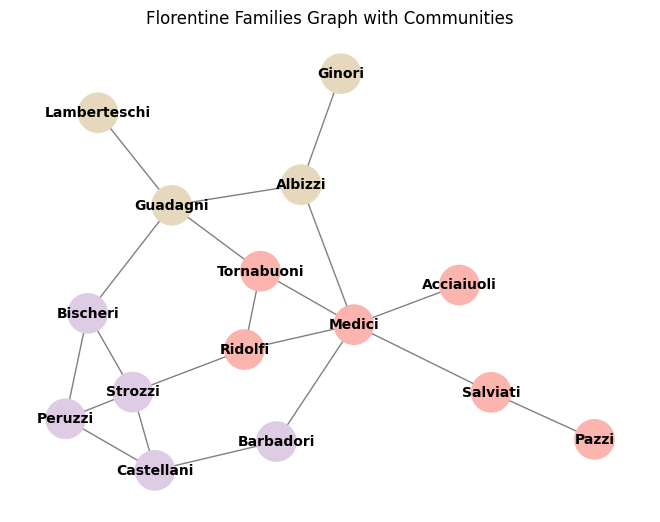

In [ ]:
import matplotlib.cm as cm
# COLOR FOR EACH COMMUNITY
color_map = {}
for i, community in enumerate(community):
    for node in community:
        color_map[node] = i

# COLORMAP FOR EACH COMMUNITY
num_communities = len(community) # CALCULATE THE NUMBER OF COMMUNITIES
cmap = cm.get_cmap('Pastel1', num_communities)

# CREATE A LIST OF NODE COLORS BASED ON THE COMMUNITY
node_colors = [cmap(color_map[node]) for node in G.nodes()]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Florentine Families Graph with Communities")
plt.show()

NOTES ON Other layouts:
- Circular layout: positions nodes in a circle, with edges drawn as chords of the circle.
- Random layout: positions nodes randomly, with edges drawn as straight lines between the nodes.
- Shell layout: positions nodes in concentric circles, with edges drawn as straight lines between the nodes.
- Spectral layout: positions nodes based on the eigenvectors of a matrix derived from the graph's adjacency matrix.
- Planar layout: positions nodes in a way that minimizes the number of edge crossings, while keeping the graph planar (i.e., no edge crossings).
- Tree layout: positions nodes in a tree-like structure, with edges drawn as straight lines between the nodes.
- Force-directed layout: similar to the spring layout, but uses a different algorithm to position the nodes.
- Layered layout: positions nodes in layers, with edges drawn as straight lines between the nodes.
- Radial layout: positions nodes in a radial pattern, with edges drawn as straight lines between the nodes.

### Ejercicio 2
**(2.5 puntos)**

a) Comenta el siguiente código y explica su funcionamiento paso a paso, detallando cómo se genera el grafo y cómo se seleccionan los nodos a conectar. **(1 punto)**




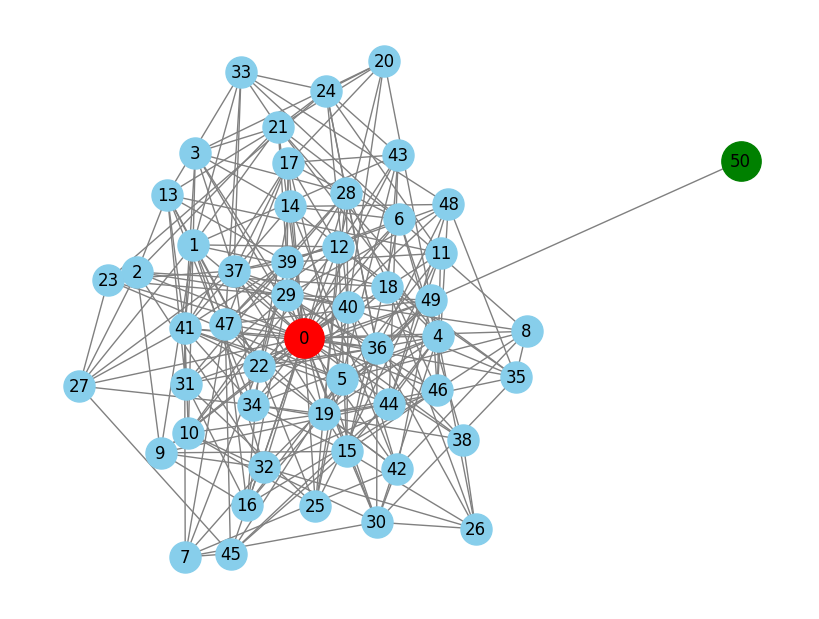

In [ ]:
import networkx as nx  # para la creación y manipulación de grafos que podemos ver thanks to matplotlib.pyplot (plt)
import matplotlib.pyplot as plt
import random #  genera los números aleatorios para la selección de nodos
import numpy as np

# Initial parameter definition for the first Erdos-Renyi graph:
N = 50 # Número de nodos que tendrá el graph inicial
p = 0.2 # The probability that an edge exists between any two nodes in the initial graph

# Generate random Erdos-Renyi graph: random undirected graph with N nodes, where each possible edge has a probability p of being included.
G = nx.erdos_renyi_graph(N, p) # N: nodes & p: probability

# Now we define a central node and its connectivity:
nodo_central = 0  # The node with label 0 is designated as the central node.
porcentaje_conexion = 0.7 # The percentage of other nodes that the central node will be connected to.
num_conexiones = int(N * porcentaje_conexion) # The exact number of connections the central node will have is calculated.

# We randomly select some nodes to connect to the central node (nodo_central):
otros_nodos = [n for n in G.nodes if n != nodo_central] # Every node in the graph—aside from the center node—is included in a list called otros_nodos.
nodos_a_conectar = random.sample(otros_nodos, num_conexiones) # The 'otros_nodos' list is used to randomly choose the 'num_conexiones' nodes.
# The graph G is expanded to include edges that link each node in the 'nodos_a_conectar' list to the 'nodo_central'.

# Adding edges between the central node and the selected nodes:
G.add_edges_from([(nodo_central, n) for n in nodos_a_conectar])
# Edges are added to the graph G, connecting the 'nodo_central' with each of the nodes in the 'nodos_a_conectar' list.

# Introducing a node with few connections:
nodo_poco_conectado = N # A label equal to the previous number of nodes (initially 50) is applied to a newly formed node.
N += 1 # The graph's overall node count is increased.

# Defining the connectivity of the poorly connected node:
porcentaje_conexion_poco = 0.02 # A very low percentage of other nodes that this new node will be connected to is defined.
num_conexiones_poco = int(N * porcentaje_conexion_poco) # The number of connections for the poorly connected node is calculated.

# Randomly selecting nodes to connect to the poorly connected node:
otros_nodos_para_poco = [n for n in G.nodes if n != nodo_poco_conectado] # A list is created with all nodes except the poorly connected node.
nodos_a_conectar_poco = random.sample(otros_nodos_para_poco, num_conexiones_poco) # 'num_conexiones_poco' nodes are randomly selected.

# Adding edges for the nodo_poco_conectado:
G.add_edges_from([(nodo_poco_conectado, n) for n in nodos_a_conectar_poco]) # We join the nodes in 'nodos_a_conectar_poco' with the nodes in 'nodo_poco_conectado' by adding the Edges to graph G.

# Visualizing the graph:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G) # The "spring layout" approach is used to construct a node layout that groups related nodes and minimizes edge crossings.
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500)
# The determined layout is used to draw graph G.
# - with_labels=True: Displays the nodes' labels.
# - node_color="skyblue": This sets the nodes' color to navy.
# - edge_color="gray": This sets the edges' color to gray.
# - node_size=500: Establishes the nodes' dimensions.
nx.draw_networkx_nodes(G, pos, nodelist=[nodo_central], node_color="red", node_size=800) # The nodo_central is specifically redrawn with a red color and a larger size.
nx.draw_networkx_nodes(G, pos, nodelist=[nodo_poco_conectado], node_color="green", node_size=800) # The nodo_poco_conectado is specifically redrawn with a green color and a larger size.


# Display the generated graph:
plt.show()

- 51 nodes (50 + 1).

- The `Central Node` (Red) with the label of 0 and is connected to the majority of the nodes (70% -porcentaje_conexion)

- The `Poorly Connected Node` (Green) with the label of 50 and is connected to only a small percentage of the other nodes (2%).

- In this graph, we can se tha the `Central node` is connected to all of them (so popular) while the `Poorly Connected Node` (wallflower) is only conected to `Central node`.

### RUNNING THIS CODE:


```
import networkx as nx  # para la creación y manipulación de grafos que podemos ver thanks to matplotlib.pyplot (plt)
import matplotlib.pyplot as plt
import random #  genera los números aleatorios para la selección de nodos
import numpy as np

# Initial parameter definition for the first Erdos-Renyi graph:
N = 50 # Número de nodos que tendrá el graph inicial
p = 0.2 # The probability that an edge exists between any two nodes in the initial graph

# Generate random Erdos-Renyi graph: random undirected graph with N nodes, where each possible edge has a probability p of being included.
G = nx.erdos_renyi_graph(N, p) # N: nodes & p: probability

# Now we define a central node and its connectivity:
nodo_central = 0  # The node with label 0 is designated as the central node.
porcentaje_conexion = 0.7 # The percentage of other nodes that the central node will be connected to.
num_conexiones = int(N * porcentaje_conexion) # The exact number of connections the central node will have is calculated.

# We randomly select some nodes to connect to the central node (nodo_central):
otros_nodos = [n for n in G.nodes if n != nodo_central] # Every node in the graph—aside from the center node—is included in a list called otros_nodos.
nodos_a_conectar = random.sample(otros_nodos, num_conexiones) # The 'otros_nodos' list is used to randomly choose the 'num_conexiones' nodes.
# The graph G is expanded to include edges that link each node in the 'nodos_a_conectar' list to the 'nodo_central'.

# Adding edges between the central node and the selected nodes:
G.add_edges_from([(nodo_central, n) for n in nodos_a_conectar])
# Edges are added to the graph G, connecting the 'nodo_central' with each of the nodes in the 'nodos_a_conectar' list.

# Introducing a node with few connections:
nodo_poco_conectado = N # A label equal to the previous number of nodes (initially 50) is applied to a newly formed node.
N += 1 # The graph's overall node count is increased.

# Defining the connectivity of the poorly connected node:
porcentaje_conexion_poco = 0.02 # A very low percentage of other nodes that this new node will be connected to is defined.
num_conexiones_poco = int(N * porcentaje_conexion_poco) # The number of connections for the poorly connected node is calculated.

# Randomly selecting nodes to connect to the poorly connected node:
otros_nodos_para_poco = [n for n in G.nodes if n != nodo_poco_conectado] # A list is created with all nodes except the poorly connected node.
nodos_a_conectar_poco = random.sample(otros_nodos_para_poco, num_conexiones_poco) # 'num_conexiones_poco' nodes are randomly selected.

# Adding edges for the nodo_poco_conectado:
G.add_edges_from([(nodo_poco_conectado, n) for n in nodos_a_conectar_poco]) # We join the nodes in 'nodos_a_conectar_poco' with the nodes in 'nodo_poco_conectado' by adding the Edges to graph G.

# Visualizing the graph:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G) # The "spring layout" approach is used to construct a node layout that groups related nodes and minimizes edge crossings.
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500)
# The determined layout is used to draw graph G.
# - with_labels=True: Displays the nodes' labels.
# - node_color="skyblue": This sets the nodes' color to navy.
# - edge_color="gray": This sets the edges' color to gray.
# - node_size=500: Establishes the nodes' dimensions.
nx.draw_networkx_nodes(G, pos, nodelist=[nodo_central], node_color="red", node_size=800) # The nodo_central is specifically redrawn with a red color and a larger size.
nx.draw_networkx_nodes(G, pos, nodelist=[nodo_poco_conectado], node_color="green", node_size=800) # The nodo_poco_conectado is specifically redrawn with a green color and a larger size.


# Display the generated graph:
plt.show()
```



b) Calcula la media del número de conexiones (*degree*) de los nodos del grafo. ¿Qué nodo tiene el mayor y el menos número de conexiones y cuántas conexiones tiene? **(0.5 puntos)**



In [ ]:
# Calculate the degree of each node: bc we are using random each time we run the code, a different set of edges will appear
degree_sequence = dict(G.degree())

# Calculate the degree of each node
degree_sequence = dict(G.degree())

# Calculate the average degree
average_degree = sum(degree_sequence.values()) / len(degree_sequence)
print(f"La media del número de conexiones (degree) de los nodos del grafo es: \033[38;5;221m {average_degree:.2f} \033[0m")

# Find the node with the highest (max) degree
node_max_degree = max(degree_sequence, key=degree_sequence.get)
max_degree = degree_sequence[node_max_degree]
print(f"El nodo con el mayor número de conexiones es el nodo \x1b[38;5;163m {node_max_degree} \033[0m con \033[31m {max_degree} \033[0m conexion(es).")

# Find the node with the lowest (min) degree
node_min_degree = min(degree_sequence, key=degree_sequence.get)
min_degree = degree_sequence[node_min_degree]
print(f"El nodo con el menor número de conexiones es el nodo \033[32m {node_min_degree} \033[0m con \033[38;5;47m {min_degree} \033[0m conexion(es).")


La media del número de conexiones (degree) de los nodos del grafo es:  10.31 
El nodo con el mayor número de conexiones es el nodo  0  con  39  conexion(es).
El nodo con el menor número de conexiones es el nodo  50  con  1  conexion(es).


c) Calcula el camino más corto entre el nodo más conectado (mayor *degree*) y el menos conectado (menor *degree*). Muestra visualmente este camino pintándolo de otro color en el grafo. **(1 punto)**

The shortest path from node  0  to node  50  is: [0, 24, 50]



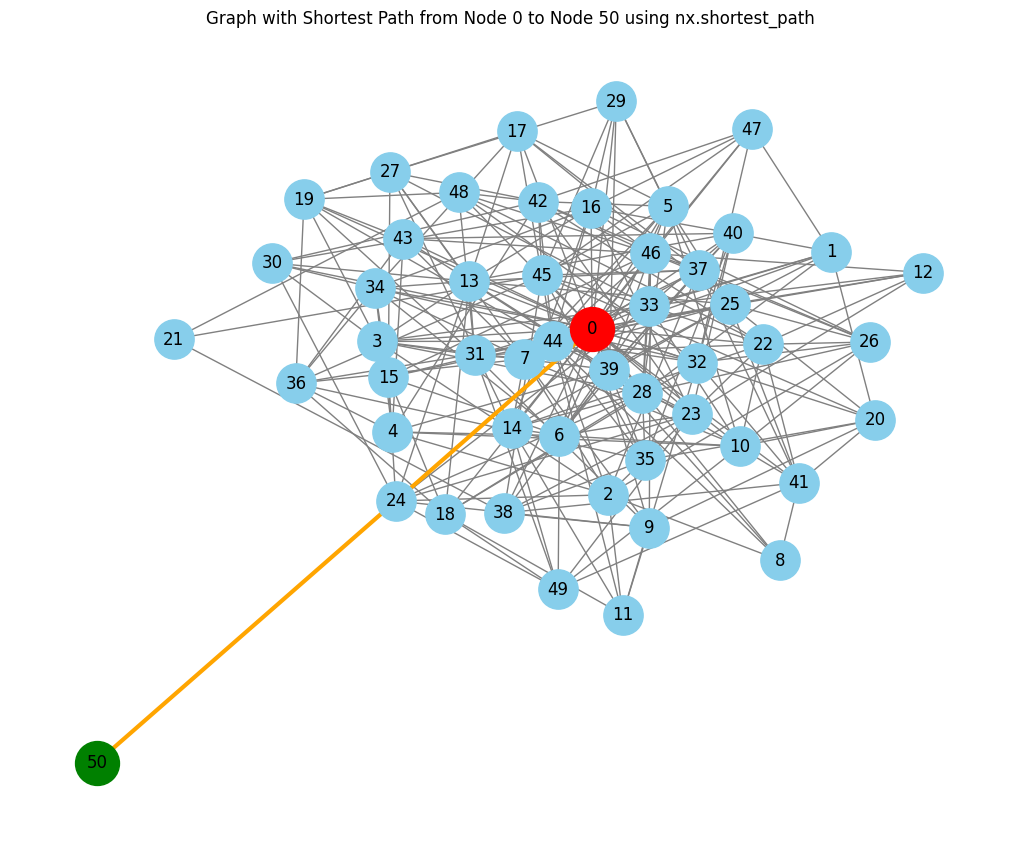

In [ ]:
# Find the shortest path using nx.shortest_path (G, source=node_max_degree, target=node_min_degree)
# Try/ Except: error handling
try:
    shortest_path = nx.shortest_path(G, source=node_max_degree, target=node_min_degree) #  variable: shortest_path
# nx.shortest_path(): function that helps us find the shortest path between two nodes. For unweighted and weighted graphs.
    print(f"The shortest path from node \x1b[38;5;163m {node_max_degree} \033[0m to node \033[32m {node_min_degree} \033[0m is: {shortest_path}\n")

    # Create a list of edges in the shortest path
    shortest_path_edges = list(nx.utils.pairwise(shortest_path))

    # Visualize the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)

    # Draw all nodes and edges
    nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=800)

    # Highlight the source and target nodes
    nx.draw_networkx_nodes(G, pos, nodelist=[node_max_degree], node_color="red", node_size=1000)
    nx.draw_networkx_nodes(G, pos, nodelist=[node_min_degree], node_color="green", node_size=1000)

    # Draw the shortest path edges
    nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color="orange", width=3)

    plt.title(f"Graph with Shortest Path from Node {node_max_degree} to Node {node_min_degree} using nx.shortest_path")
    plt.show()

except nx.NetworkXNoPath:
    print(f"No path exists between node \x1b[38;5;163m {node_max_degree} \033[0m and node \033[32m {node_min_degree}.")

If we had a weighted graph:


```
# Find the shortest path using nx.dijkstra_path (G, source=node_max_degree, target=node_min_degree)
# Try/ Except: error handling
try:
    shortest_path = nx.dijkstra_path(G, source=node_max_degree, target=node_min_degree) #  variable: shortest_path
# nx.dijkstra_path(): function that helps us find the shortest path between two nodes. Calculates the path with the lowest total weight.
    print(f"The shortest path from node \x1b[38;5;163m {node_max_degree} \033[0m to node \033[32m {node_min_degree} \033[0m is: {shortest_path}\n")

    # Create a list of edges in the shortest path
    shortest_path_edges = list(nx.utils.pairwise(shortest_path))

    # Visualize the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)

    # Draw all nodes and edges
    nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=800)

    # Highlight the source and target nodes
    nx.draw_networkx_nodes(G, pos, nodelist=[node_max_degree], node_color="red", node_size=1000)
    nx.draw_networkx_nodes(G, pos, nodelist=[node_min_degree], node_color="green", node_size=1000)

    # Draw the shortest path edges
    nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color="orange", width=3)

    plt.title(f"Graph with Shortest Path from Node {node_max_degree} to Node {node_min_degree} using nx.dijkstra_path")
    plt.show()

except nx.NetworkXNoPath:
    print(f"No path exists between node \x1b[38;5;163m {node_max_degree} \033[0m and node \033[32m {node_min_degree}.")
except nx.NodeNotFound as e:
    print(f"Error: One or both of the specified nodes were not found in the graph: {e}")
```
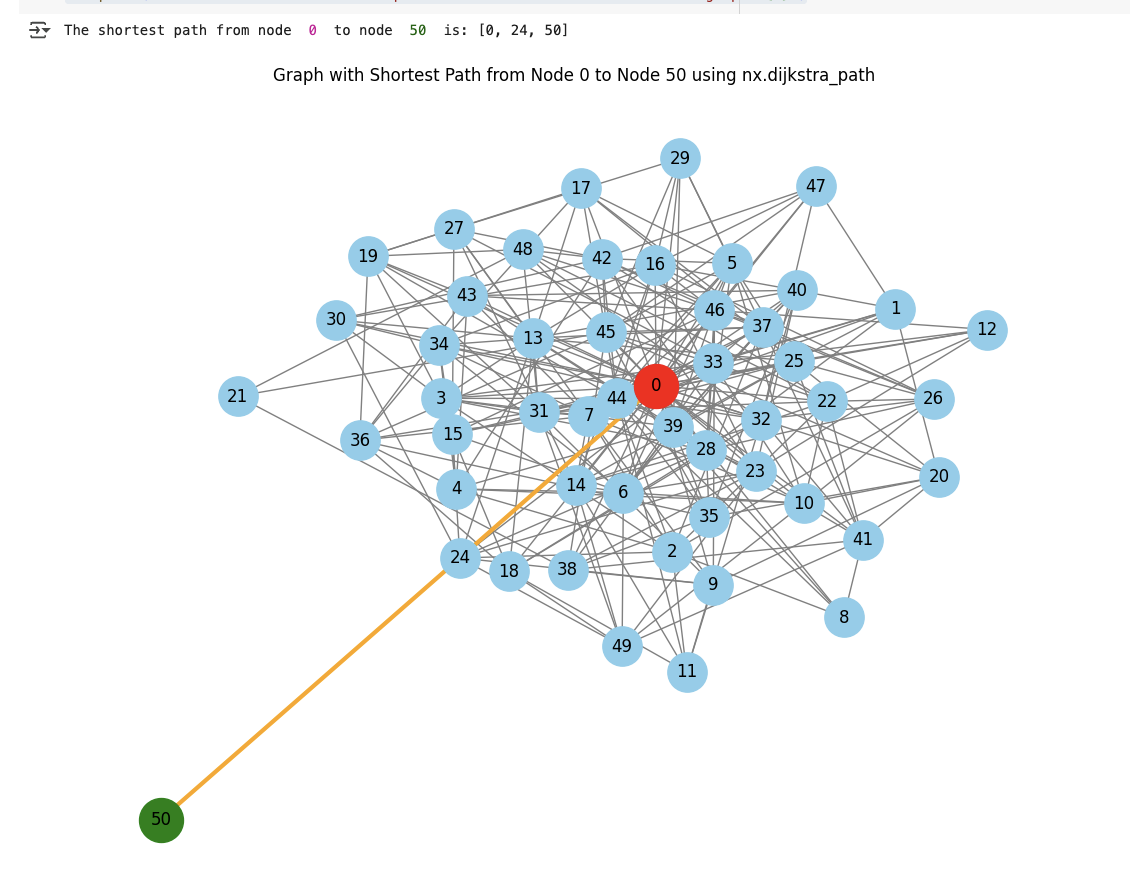


## Ejercicio 3
**(4 puntos)**

a) Simula la propagación de una enfermedad (por ejemplo, la gripe) en el grafo anterior utilizando el modelo SIR (Susceptibles, Infectados, Recuperados) de la librería EoN. Parte del nodo más conectado identificado en el ejercicio 2 como el nodo infectado inicial. **(0.5 puntos)**





In [ ]:
!pip install EoN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.2-py3-none-any.whl size=122468 sha256=6720be1c6ecff799a8b14fed6494f179f6fcabe28925ea77f580dd6096444870
  Stored in directory: /root/.cache/pip/wheels/10/ec/88/6daefcc5ebdf7e373db9da6a61386f33143571d885c4c7708a
Successfully built EoN


In [ ]:
import EoN as eon
# Simulamos la propagación de una enfermedad en el grafo utilizando un modelo SIR (Susceptibles, Infectados, Recuperados)

# Initial parameter definition for the first Erdos-Renyi graph:
N = 50  # Número de nodos
p = 0.2

# Generate random Erdos-Renyi graph using exercise 2:
G = nx.erdos_renyi_graph(N, p)

# Definimos los parámetros del modelo SIR
tau = 0.2   # Tasa de infección
gamma = 0.3  # Tasa de recuperación

# Calculamos la simulación SIR con vacunación: El nodo con el mayor número de conexiones es el nodo 0
t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={0}) # initial_infecteds = range(initial_size)?

b) Calcula el valor máximo de infectados y el tiempo necesario para llegar a este pico. Muesta también las curvas de susceptibles, infectados y recuperados del modelo SIR. **(1 punto)**



Maximum number of infected individuals:  19 
Time to reach the peak:  5.426927005541905



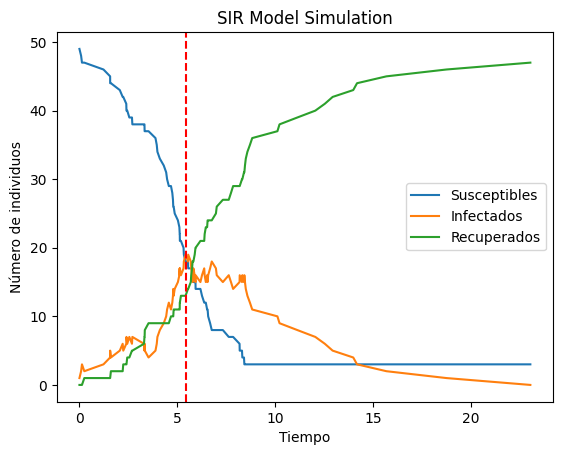

In [ ]:
# Find the maximum number of infected individuals
max_infected = max(I)

# Find the time at which the peak occurs
peak_time = t[I.argmax()]

# Results
print(f"Maximum number of infected individuals: \033[38;5;221m {max_infected} \033[0m")
print(f"Time to reach the peak: \033[38;5;199m {peak_time}\n")

# Plot the SIR curves
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo") # progression of time during the simulation
plt.ylabel("Número de individuos") # count of individuals in each compartment of the model
plt.legend()
plt.title("SIR Model Simulation")

# DASHED LINE AT PEAK TIME
plt.axvline(x=peak_time, color='red', linestyle='--') # axvline: VERTICAL LINES ACCROSS THE AXES

plt.show()

c) Analiza las siguientes situaciones:

- ¿Cómo cambia el resultado si se escoge el nodo menos conectado como nodo inicial?
- ¿Y si se elimina del grafo el nodo más conectado?
- ¿Y si se modifican los valores de las tasa de infección y de recuperación?

**Nota 1**: Podéis usar la función `remove_node` para eliminar un nodo.

**Nota 2**: Compara los valores del máximo número de infectado y el tiempo necesario para llegar a este pico, y las curvas de susceptibles, infectados y recuperados entre los distintos escenarios/situaciones.

**(1.5 puntos)**



Maximum number of infected individuals:  34 
Time to reach the peak:  3.7910876986465682



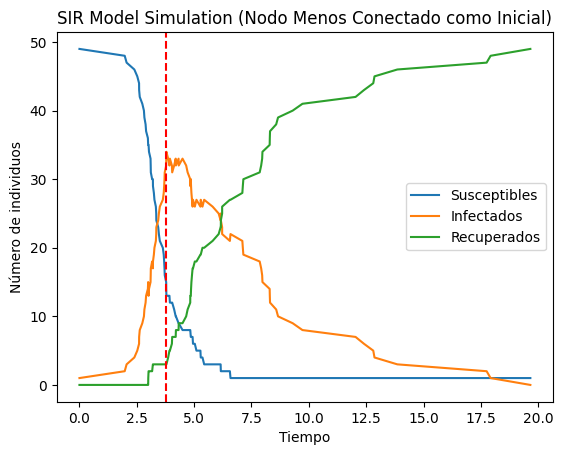

In [ ]:
# ¿Cómo cambia el resultado si se escoge el nodo menos conectado como nodo inicial?

# Encontrar el nodo con el grado mínimo
node_min_degree = min(dict(G.degree()), key=dict(G.degree()).get)

# Calculamos la simulación SIR con vacunación: El nodo con el menos número de conexiones
t, S, I, R = eon.fast_SIR(G, tau=0.2, gamma=0.3, initial_infecteds={node_min_degree})

# Find the time at which the peak occurs and the max infected
max_infected = max(I)
peak_time = t[I.argmax()]

# Results
print(f"Maximum number of infected individuals: \033[38;5;221m {max_infected} \033[0m")
print(f"Time to reach the peak: \033[38;5;199m {peak_time}\n")

# Plot the SIR curves
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo") # progression of time during the simulation
plt.ylabel("Número de individuos") # count of individuals in each compartment of the model
plt.legend()
plt.title("SIR Model Simulation (Nodo Menos Conectado como Inicial)")


# DASHED LINE AT PEAK TIME
plt.axvline(x=peak_time, color='red', linestyle='--') # axvline: VERTICAL LINES ACCROSS THE AXES

plt.show()

- We can observe how the dynamics of the epidemic are affected by the original infection point. Since this node has fewer contacts to propagate the virus to (rural area?), starting with a less connected node usually results in a slower initial spread.
- The final peak of 34 infected individuals shows that the epidemic can still spread dramatically as the infection spreads to additional interconnected areas of the network.

Maximum number of infected individuals:  27
Time to reach the peak:  5.085964140420543



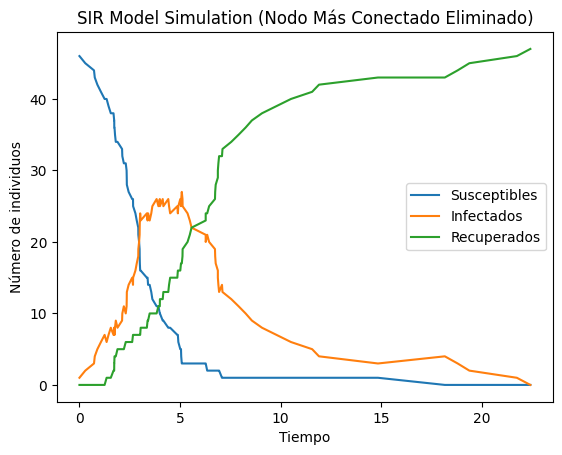

In [ ]:
# ¿Y si se elimina del grafo el nodo más conectado?
# Encontrar el nodo con el grado máximo
node_max_degree = max(dict(G.degree()), key=dict(G.degree()).get)

# ELIMINATE node_max_degree
G.remove_node(node_max_degree)

# Simular la propagación (iniciando, por ejemplo, desde el nodo 0)
t, S, I, R = eon.fast_SIR(G, tau=0.2, gamma=0.3, initial_infecteds={0})

# Encontrar el valor máximo de infectados y el tiempo al pico
max_infected = max(I)
peak_time = t[I.argmax()]

# Results
print(f"Maximum number of infected individuals: \033[38;5;221m {max_infected}\033[0m")
print(f"Time to reach the peak: \033[38;5;199m {peak_time}\n")

# Plot the SIR curves
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo") # progression of time during the simulation
plt.ylabel("Número de individuos") # count of individuals in each compartment of the model
plt.legend()
plt.title("SIR Model Simulation (Nodo Más Conectado Eliminado)")

plt.show()

- The peak number of infected individuals is 27 in this case, which is lower than the simulation starting from a potentially less connected node (34).
- This suggests that removing a highly connected individual can limit the overall spread of the disease compared to starting from a less connected node in the original network. So this means that a highly connected nodes act as hubs, facilitating rapid transmission like wildfire.
- It takes roughly 5.09 time units to reach the peak, which is a little longer than the simulation's start time from a node that might be less linked (~3.79). This implies that the early acceleration of the pandemic can be slowed down by eliminating a key hub.
-In conclusion, the effective propagation of the disease is disrupted when the most linked node is removed from the network. This emphasizes how crucial highly linked people are to the spread of diseases inside a network.

Maximum number of infected individuals:  31 
Time to reach the peak:  1.505546258142262



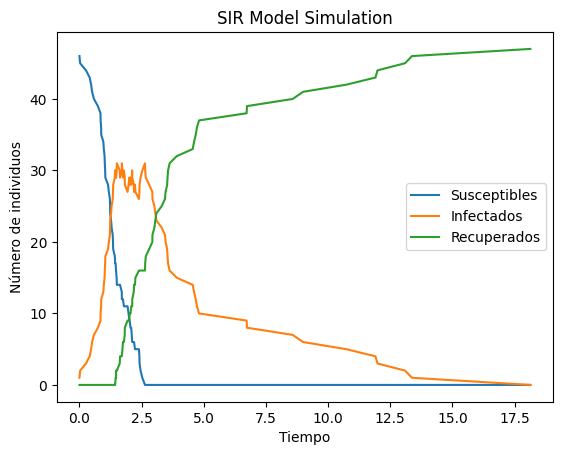

In [ ]:
# ¿Y si se modifican los valores de las tasa de infección y de recuperación?
# Escenario 1: Increase the rate of infection (tau)
tau = 0.4  # Valor original: 0.2
gamma = 0.3

t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={0})

# Find the maximum number of infected individuals
max_infected = max(I)

# Find the time at which the peak occurs
peak_time = t[I.argmax()]

# Results
print(f"Maximum number of infected individuals: \033[38;5;221m {max_infected} \033[0m")
print(f"Time to reach the peak: \033[38;5;199m {peak_time}\n")

# Plot the SIR curves
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo") # progression of time during the simulation
plt.ylabel("Número de individuos") # count of individuals in each compartment of the model
plt.legend()
plt.title("SIR Model Simulation")
plt.show()

- The maximum number of infected individuals reaches 31, which is slightly lower than when starting with a less connected node (34).
- Additionally, the peak occurs much earlier, at around time 1.5, compared to around 3.8 when starting from a less connected node. This suggests that the disease spreads through the community considerably more quickly when the infection rate is higher.
- A higher infection rate causes the epidemic to spread more swiftly.
- In conclusion, a higher infection rate significantly quickens the disease's network spread. This causes the number of sick people to peak higher and much earlier, the vulnerable population to decline more quickly, and the number of recovered people to accumulate more quickly.

Maximum number of infected individuals:  32 
Time to reach the peak:  9.251120489110281



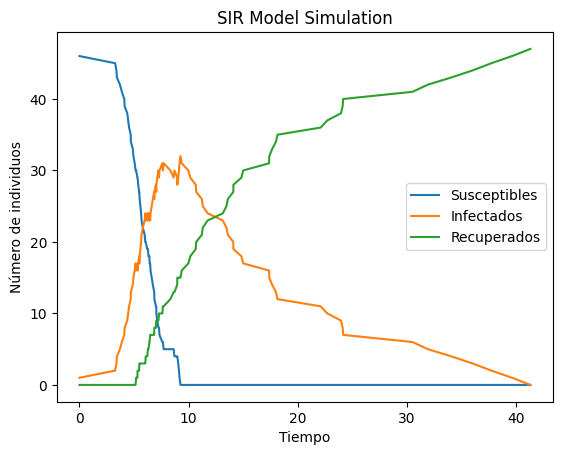

In [ ]:
# Escenario 2: Decrease the rate of recovery (gamma)
tau = 0.2
gamma = 0.1  # Valor original: 0.3

t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={0})

# Find the maximum number of infected individuals
max_infected = max(I)

# Find the time at which the peak occurs
peak_time = t[I.argmax()]

# Results
print(f"Maximum number of infected individuals: \033[38;5;221m {max_infected} \033[0m")
print(f"Time to reach the peak: \033[38;5;199m {peak_time}\n")

# Plot the SIR curves
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo") # progression of time during the simulation
plt.ylabel("Número de individuos") # count of individuals in each compartment of the model
plt.legend()
plt.title("SIR Model Simulation")
plt.show()

- The peak of infected individuals occurs much later compared to the scenario with increased infection rate. The peak is also broader, indicating that the infection persists in a significant portion of the population for a longer time. The maximum number of infected individuals (32) is also relatively high.
- In conclusion, lowering the recovery rate considerably extends the epidemic's duration.  It results in a slower pace of recovery, a more progressive loss of the vulnerable population, and a later and longer peak in infections.  This simulation demonstrates how important the recovery rate is in estimating the duration and severity of an infectious disease outbreak. A decreased rate of recovery suggests that people stay contagious for longer, which prolongs the disease's duration and transmission which is what happened during the COVID-19 pandemic.

Maximum number of infected individuals:  34 
Time to reach the peak:  4.011858596534466



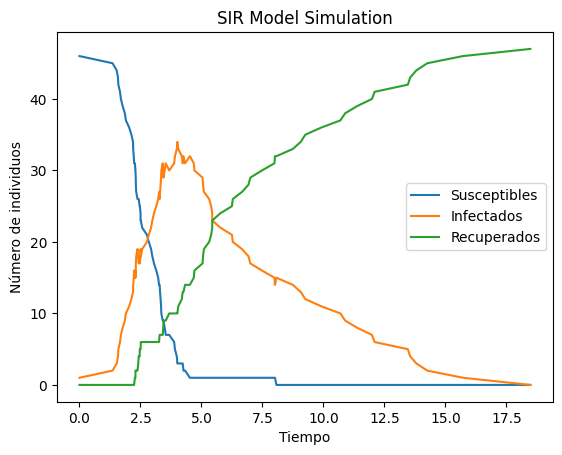

In [ ]:
# Escenario 3: Combined both
tau = 0.3
gamma = 0.2

t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={0})
# Find the maximum number of infected individuals
max_infected = max(I)

# Find the time at which the peak occurs
peak_time = t[I.argmax()]

# Results
print(f"Maximum number of infected individuals: \033[38;5;221m {max_infected} \033[0m")
print(f"Time to reach the peak: \033[38;5;199m {peak_time}\n")

# Plot the SIR curves
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo") # progression of time during the simulation
plt.ylabel("Número de individuos") # count of individuals in each compartment of the model
plt.legend()
plt.title("SIR Model Simulation")
plt.show()

- The maximum number of infected individuals (34) is the highest observed in the modified parameter simulations. The increased infection rate allows the disease to spread quickly, infecting a large portion of the population.
- In summary, decreasing the recovery rate significantly prolongs the duration of the epidemic. It leads to a later and more sustained peak in infections, a slower rate of recovery, and a more gradual depletion of the susceptible population. This simulation highlights the critical role of the recovery rate in determining the timescale and burden of an infectious disease outbreak. A decreased rate of recovery suggests that people stay contagious for longer, which prolongs the disease's duration and transmission.

d) Modela la acción de la vacunación, considerando que el 20% de la población (nodos) está vacunada y no pueden ser infectados. ¿Qué efecto tiene la vacunación en la propagación de la enfermedad? **(1 punto)**

**Nota 3**: Se puede considerar que las personas vacunadas no pueden infectarse de la enfermedad. Explora la opción `initial_recovereds` de la función **fast_SIR** para representar este efecto.

Maximum number of infected individuals: 21
Time to reach the peak:  5.065238527572314



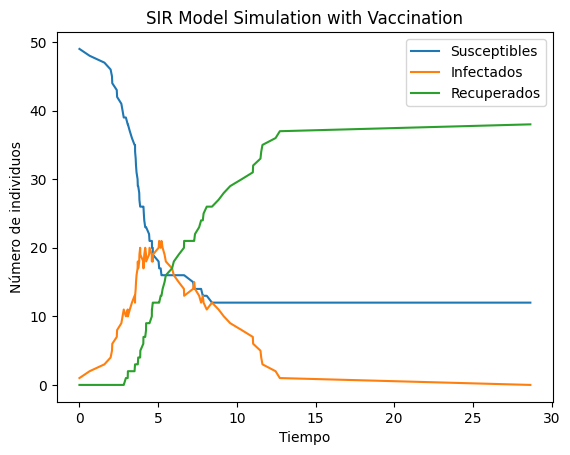

In [ ]:
# Initial parameter definition for the first Erdos-Renyi graph:
N = 50  # Number of nodes
p = 0.2  # Probability of an edge

# RANDOM ERDOS-RENYI GRAPH
G = nx.erdos_renyi_graph(N, p)

# PARAMETERS FOR THE SIR MODEL
tau = 0.2  # Infection rate
gamma = 0.3  # Recovery rate

# Vaccination: 20% OF THE POPULATION IS VACCIINATED
num_vaccinated = int(N * 0.2)
vaccinated_nodes = random.sample(list(G.nodes()), num_vaccinated)

# SIR MODEL WITH VAX
t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={0}, initial_recovereds=set(vaccinated_nodes)) # initial_recovereds=set(vaccinated_nodes) parameter to the vaccinated nodes

# MAX NUMBER OF INFECTED INDIVIDUALS
max_infected = max(I)

# PEAK TIME OCCURS
peak_time = t[I.argmax()]

# RESULTS
print(f"Maximum number of infected individuals: \033[38;5;221m{max_infected}\033[0m")
print(f"Time to reach the peak: \033[38;5;199m {peak_time}\n")

# SIR curves
import matplotlib.pyplot as plt
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo") # progression of the epidemic over time
plt.ylabel("Número de individuos") # count of individuals in each compartment of the model
plt.legend()
plt.title("SIR Model Simulation with Vaccination")
plt.show()

- We can observe that the maximum number of infected individuals in this simulation is 21. In a scenario without vaccination, this peak would likely be higher.

- The time to reach the peak is around 5.06. Vaccination can sometimes delay the peak and potentially lower its magnitude.

- The trajectory of the "Infectados" curve suggests that the total number of individuals who get infected over the course of the epidemic is reduced due to the presence of vaccinated individuals who act as a buffer in the network, preventing further spread and creating herd immunity.

- The final level of "Recuperados" is higher because it includes both those who recovered from the infection and those who were initially vaccinated.

- The result is a lower infection peak and a reduced overall burden on the healthcare system and society. Overall, we can see why vaccines are super important and why they work. For example, during the COVID-19 pandemic, those of who got the vaccine may or may not got covid. And if they did, their symptoms were not life threating (counting only those who did not had any other maladies).